<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.3-bin-hadoop3.2.tgz

In [ ]:

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.3-bin-hadoop3.2"



In [ ]:
!pip install -q findspark

In [ ]:

!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
#crear sesion
import findspark

findspark.init()

import pyspark

from pyspark.sql.functions import *

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()



# Cargar los datos

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType,BooleanType

In [ ]:
df_schema = StructType(fields=[StructField('video_id',StringType(),False),
                        StructField('trending_date',StringType(),False),
                        StructField('title',StringType(),False),
                        StructField('channel_title',StringType(),False),
                        StructField('category_id',IntegerType(), False),
                        StructField('publish_time',StringType(), False),
                        StructField('tags',StringType(),False),
                        StructField('views',IntegerType(), False),
                        StructField('likes',IntegerType(), False),
                        StructField('dislikes',IntegerType(), False),
                        StructField('comment_count',IntegerType(), False),
                        StructField('thumbnail_link',StringType(),False),
                        StructField('comments_disabled',BooleanType(), False),
                        StructField('ratings_disabled', BooleanType(), False),
                        StructField('video_error_or_removed',BooleanType(), False),
                        StructField('description',StringType(),False)])

In [ ]:
dfmex = spark.read.option('header',True).schema(df_schema).csv('./drive/MyDrive/MXvideos.csv')

In [ ]:
dfus = spark.read.option('header',True).schema(df_schema).csv('./drive/MyDrive/USvideos.csv')

In [ ]:
dfmex.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: integer (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
dfmex.show(truncate=False)

+-----------+-------------+-----------------------------------------------------------------------------------------+----------------------------------+-----------+------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+-----+--------+-------------+----------------------------------------------+-----------------+----------------+----------------------+----------------------------------------------------------------------------------------------------------------

In [ ]:
dfmex.count()

43819

In [ ]:
dfus.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            false|           fal

In [ ]:
dfus.count()

48137

In [ ]:
df = dfmex.union(dfus)

In [ ]:
df.count()

91956

In [ ]:
df.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|SbOwzAl9ZfQ|     17.14.11|Capítulo 12 | Mas...|     MasterChef 2017|         24|2017-11-13T06:06:...|"MasterChef Junio...| 310130| 4182|     361|         1836|https://i.ytimg.c...|            false|           false| 

In [ ]:
from datetime import datetime



In [ ]:
def clean_trending_date(date_str):
  try:
    date_str_obj =datetime.strptime(date_str,'%y.%d.%m').date()
    return date_str_obj
  except (ValueError,TypeError):
    return None

In [ ]:
def clean_trending_date_hour(date_str):
  try:
    date_str_obj = datetime.strptime(date_str,'%Y-%m-%dT%H:%M:%S.%f%z').date()
    return date_str_obj
  except (ValueError,TypeError):
    return None


#,'clean_trending_date_hour(publish_time) as publish_time'
#                    .filter('publish_time is not null')\

In [ ]:
spark.udf.register('clean_trending_date', clean_trending_date, DateType())

<function __main__.clean_trending_date(date_str)>

In [ ]:
spark.udf.register('clean_trending_date_hour', clean_trending_date_hour, DateType())

<function __main__.clean_trending_date_hour(date_str)>

In [ ]:
dff = df.selectExpr('video_id','clean_trending_date(trending_date) as trending_date','clean_trending_date_hour(publish_time) as publish_time', 'title','category_id','tags','views', 'likes', 'dislikes', 'comment_count')\
                    .filter('trending_date is not null')\
                    .filter('publish_time is not null')\
                    .filter('title is not null')\
                    .filter('video_error_or_removed is not True')\
                    .filter('comments_disabled is not True')\
                    .filter('ratings_disabled is not True')


In [ ]:
dff.show()

+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+
|   video_id|trending_date|publish_time|               title|category_id|                tags|  views|likes|dislikes|comment_count|
+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+
|SbOwzAl9ZfQ|   2017-11-14|  2017-11-13|Capítulo 12 | Mas...|         24|"MasterChef Junio...| 310130| 4182|     361|         1836|
|klOV6Xh-DnI|   2017-11-14|  2017-11-13|ALEXA EX-INTEGRAN...|         22|     La Voz Mexico 7| 104972|  271|     174|          369|
|6L2ZF7Qzsbk|   2017-11-14|  2017-11-13|LOUIS CKAGÓ - EL ...|         25|"Chumel Torres|""...| 136064|10105|     266|          607|
|hcY52MFWMDM|   2017-11-14|  2017-11-13|Sismo de 6.7 sacu...|         25|"temblor|""costa ...|  96153|  378|     171|          208|
|_OXDcGPVAa4|   2017-11-14|  2017-11-13|DOG HACKS | MUSAS...|         26|"MU

In [ ]:
dff.count()

79719

In [ ]:
dff.schema

StructType(List(StructField(video_id,StringType,true),StructField(trending_date,DateType,true),StructField(publish_time,DateType,true),StructField(title,StringType,true),StructField(category_id,IntegerType,true),StructField(tags,StringType,true),StructField(views,IntegerType,true),StructField(likes,IntegerType,true),StructField(dislikes,IntegerType,true),StructField(comment_count,IntegerType,true)))

In [ ]:
dff = dff.withColumn("intervalo", datediff(dff.trending_date,dff.publish_time))

In [ ]:
dff = dff.withColumn("tasa", (col("likes") - col("dislikes")) / col("views"))

In [ ]:
dff.show()

+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+
|   video_id|trending_date|publish_time|               title|category_id|                tags|  views|likes|dislikes|comment_count|intervalo|                tasa|
+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+
|SbOwzAl9ZfQ|   2017-11-14|  2017-11-13|Capítulo 12 | Mas...|         24|"MasterChef Junio...| 310130| 4182|     361|         1836|        1|0.012320639731725406|
|klOV6Xh-DnI|   2017-11-14|  2017-11-13|ALEXA EX-INTEGRAN...|         22|     La Voz Mexico 7| 104972|  271|     174|          369|        1|9.240559387265175E-4|
|6L2ZF7Qzsbk|   2017-11-14|  2017-11-13|LOUIS CKAGÓ - EL ...|         25|"Chumel Torres|""...| 136064|10105|     266|          607|        1| 0.07231155926622766|
|hcY52MFWMDM|   2017-1

In [ ]:
dff.describe().show()

+-------+-----------+--------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+
|summary|   video_id|               title|      category_id|                tags|            views|             likes|          dislikes|     comment_count|         intervalo|                tasa|
+-------+-----------+--------------------+-----------------+--------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+
|  count|      79719|               79719|            79719|               79719|            79719|             79719|             79719|             79719|             79719|               79719|
|   mean|       null|               435.0| 20.4571432155446|              2018.0|1360948.080771209|  45989.4118215231|2261.7664923042184| 5370.792646671433| 9.429634089740212| 0.04003161598903973|
| stddev|      

In [ ]:
dff.filter(dff['video_id']=='#NAME?').count()

502

In [ ]:
df_um = dff.toPandas()

In [ ]:
df_um.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79719 entries, 0 to 79718
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       79719 non-null  object 
 1   trending_date  79719 non-null  object 
 2   publish_time   79719 non-null  object 
 3   title          79719 non-null  object 
 4   category_id    79719 non-null  int32  
 5   tags           79719 non-null  object 
 6   views          79719 non-null  int32  
 7   likes          79719 non-null  int32  
 8   dislikes       79719 non-null  int32  
 9   comment_count  79719 non-null  int32  
 10  intervalo      79719 non-null  int32  
 11  tasa           79719 non-null  float64
dtypes: float64(1), int32(6), object(5)
memory usage: 5.5+ MB


Visualización

In [ ]:
!pip install pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached ydata_profiling-4.3.1-py2.py3-none-any.whl (352 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Using cached phik-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (679 kB)
  Using cached multimethod-1.9.1-py3-none-any.whl (10 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached wordcloud-1.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (455 kB)
  Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_um)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

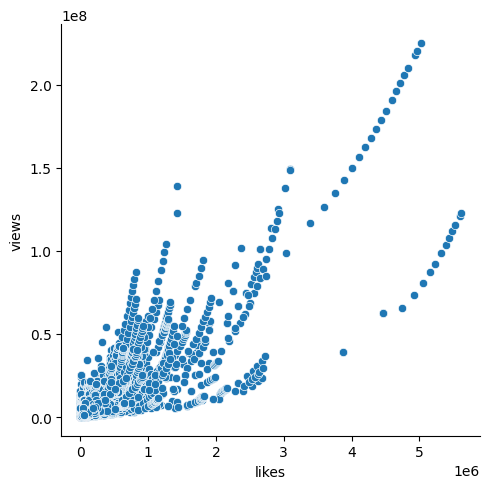

In [ ]:
sns.relplot(data=df_um, x='likes', y='views')

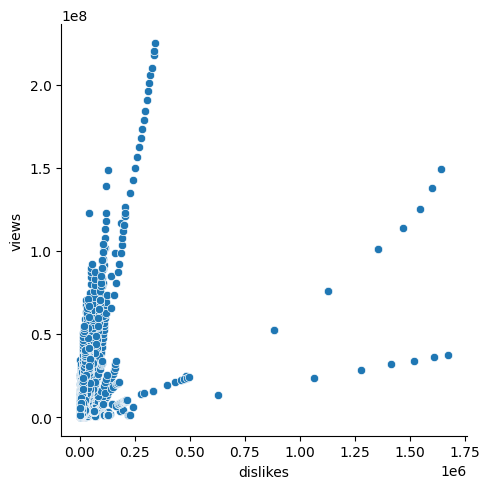

In [ ]:
sns.relplot(data=df_um, x='dislikes', y='views')

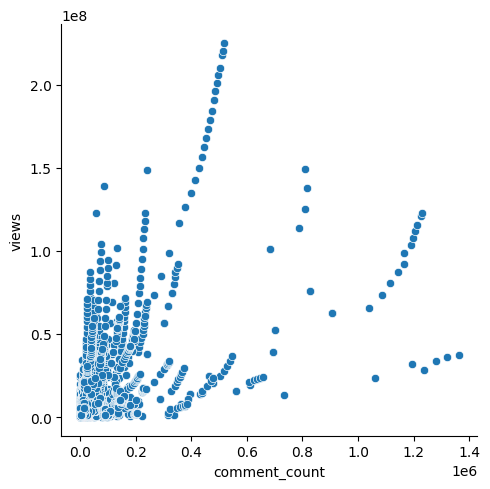

In [ ]:
#comment_count
sns.relplot(data=df_um, x='comment_count', y='views')

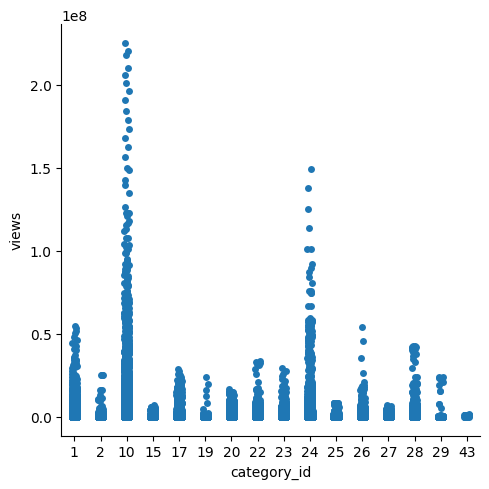

In [ ]:
sns.catplot(data=df_um, x='category_id', y='views')

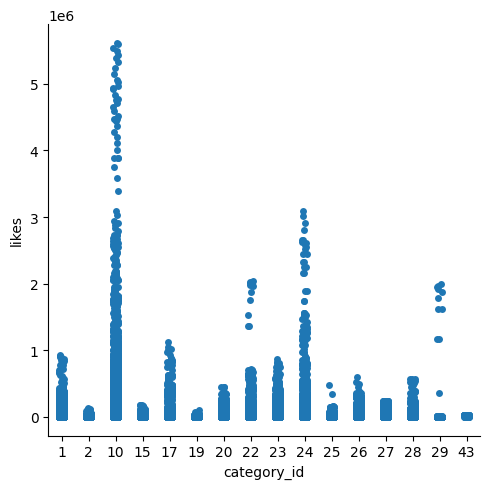

In [ ]:
sns.catplot(data=df_um, x='category_id', y='likes')

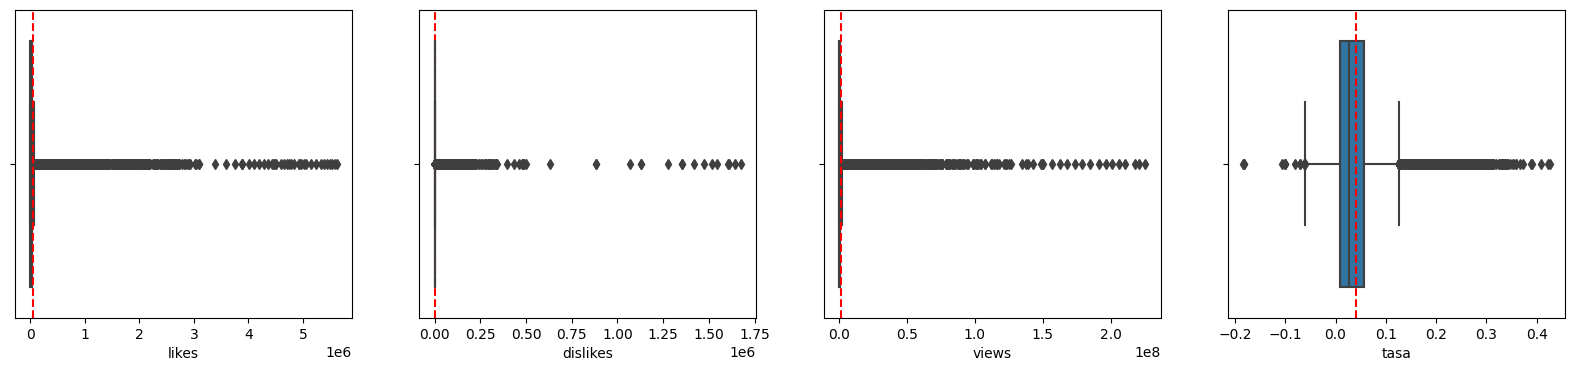

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))
sns.boxplot(data=df_um, x='likes', ax=axs[0])
axs[0].axvline(df_um['likes'].mean(), color='r', linestyle='--')

sns.boxplot(data=df_um, x='dislikes', ax=axs[1])
axs[1].axvline(df_um['dislikes'].mean(), color='r', linestyle='--')

sns.boxplot(data=df_um, x='views', ax=axs[2])
axs[2].axvline(df_um['views'].mean(), color='r', linestyle='--')

sns.boxplot(data=df_um, x='tasa', ax=axs[3])
axs[3].axvline(df_um['tasa'].mean(), color='r', linestyle='--')

In [ ]:
df_um.views.mean()

1360948.080771209

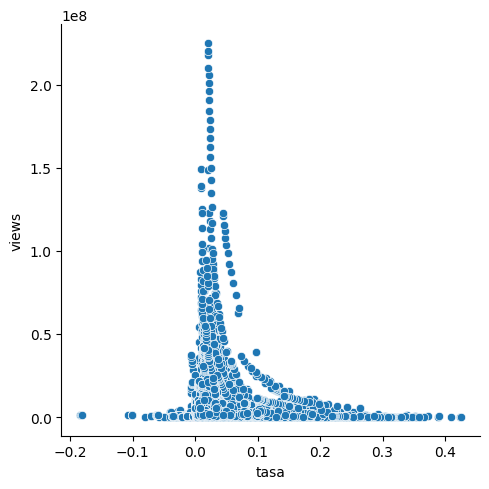

In [ ]:
sns.relplot(data=df_um, x='tasa', y='views')

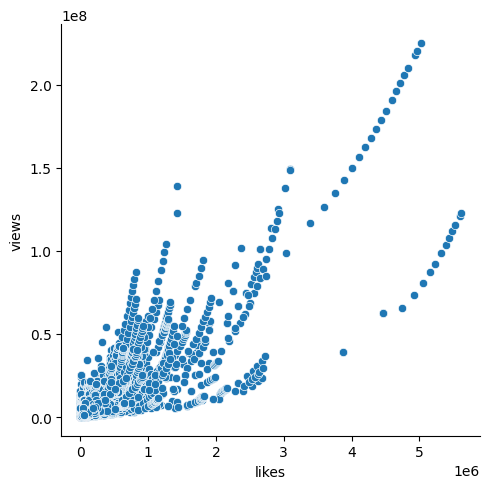

In [ ]:
sns.relplot(data=df_um, x='likes', y='views')

# Agregar etiquetas



In [ ]:
from pyspark.sql.window import Window

# Calcula la media de la columna "views"
mediana_views = dff.approxQuantile("views", [0.5], 0.01)[0]

# Crea una columna "p_label" utilizando la función when de Spark SQL
dff = dff.withColumn("p_label", when(col("views") > mediana_views, 1).otherwise(0))

In [ ]:
mediana_views

228132.0

In [ ]:
dff.show()

+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+-------+
|   video_id|trending_date|publish_time|               title|category_id|                tags|  views|likes|dislikes|comment_count|intervalo|                tasa|p_label|
+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+-------+
|SbOwzAl9ZfQ|   2017-11-14|  2017-11-13|Capítulo 12 | Mas...|         24|"MasterChef Junio...| 310130| 4182|     361|         1836|        1|0.012320639731725406|      1|
|klOV6Xh-DnI|   2017-11-14|  2017-11-13|ALEXA EX-INTEGRAN...|         22|     La Voz Mexico 7| 104972|  271|     174|          369|        1|9.240559387265175E-4|      0|
|6L2ZF7Qzsbk|   2017-11-14|  2017-11-13|LOUIS CKAGÓ - EL ...|         25|"Chumel Torres|""...| 136064|10105|     266|          607|        1| 0.0

In [ ]:
dff.select(sum(when(dff.p_label == 1, 1).otherwise(0))).collect()[0][0]

40049

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [ ]:

labels = dff.select("p_label").rdd.flatMap(lambda x: x).collect()

titles = dff.select("title").rdd.flatMap(lambda x: x).collect()


titles = [title.lower() for title in titles]


# Limpiar títulos que pudieron quedar vacíos
non_empty_titles = []
non_empty_labels = []
for title, etiq in zip(titles, labels):
    if title != "":
        non_empty_titles.append(title)
        non_empty_labels.append(etiq)

In [ ]:
# Tokenizar los títulos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(non_empty_titles)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(non_empty_titles)

In [ ]:
max_length = 800

padded_sequences = pad_sequences(sequences,maxlen=max_length)

In [ ]:
#Construir y entrenar el modelo
model =Sequential([
    Embedding(len(word_index)+1,16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

#Compilar

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X = np.array(padded_sequences)
y= np.array(labels)



split = int(0.8 * len(X))

X_train = X[:split]
y_train = y[:split]

X_val = X[split:]
y_val = y[split:]


history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=10
)

Epoch 1/10
1993/1993 [==============================] - 14s 7ms/step - loss: 0.6587 - accuracy: 0.6128 - val_loss: 0.7713 - val_accuracy: 0.0886
Epoch 2/10
1993/1993 [==============================] - 13s 7ms/step - loss: 0.5536 - accuracy: 0.7326 - val_loss: 0.5348 - val_accuracy: 0.8014
Epoch 3/10
1993/1993 [==============================] - 13s 7ms/step - loss: 0.5023 - accuracy: 0.7785 - val_loss: 0.3685 - val_accuracy: 0.9507
Epoch 4/10
1993/1993 [==============================] - 13s 7ms/step - loss: 0.4635 - accuracy: 0.8014 - val_loss: 0.4783 - val_accuracy: 0.7953
Epoch 5/10
1993/1993 [==============================] - 14s 7ms/step - loss: 0.4222 - accuracy: 0.8251 - val_loss: 0.3963 - val_accuracy: 0.8598
Epoch 6/10
1993/1993 [==============================] - 15s 7ms/step - loss: 0.3834 - accuracy: 0.8435 - val_loss: 0.4400 - val_accuracy: 0.7990
Epoch 7/10
1993/1993 [==============================] - 13s 7ms/step - loss: 0.3521 - accuracy: 0.8567 - val_loss: 0.4578 - val_ac

In [ ]:
model.evaluate(X_val,  y_val, verbose=2)

499/499 - 1s - loss: 0.4198 - accuracy: 0.7966 - 935ms/epoch - 2ms/step


[0.41975170373916626, 0.7966005802154541]

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

# Calcula la matriz de confusión
cm = confusion_matrix(y_val, y_pred)

print(cm)

499/499 [==============================] - 1s 1ms/step
[[  619     0]
 [15325     0]]


In [ ]:
np.unique(y_pred)

array([0])

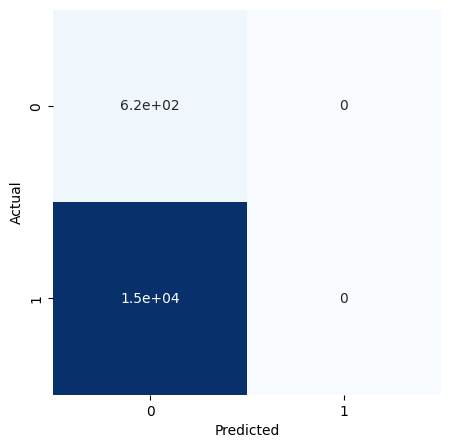

In [ ]:
# Configurar el tamaño de la figura
plt.figure(figsize=(5, 5))

# Graficar el heatmap de la matriz de confusión
sns.heatmap(confusion_matrix(y_val, y_pred),
            annot=True, #Para mostrar valores
            cbar=False, #Ocultamos la leyenda de los colores
            cmap="Blues")

# Configurar etiquetas de los ejes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Mostrar el gráfico
plt.show()

2.	¿Cuáles son los factores más influenciables que determinan las calificaciones de las películas? ¿Son influenciables? ¿Es correcto decir que son influenciables? ¿Se puede predecir? Cómo se mostraría?

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

agregar etuqueta calificación en la tasa 1 bueno sobre el promedio 0 deficiente

In [ ]:
media_tasa = dff.select(mean("tasa")).collect()[0][0]

# Crea una columna "c_label" utilizando la función when de Spark SQL
dff = dff.withColumn("c_label", when(col("tasa") >media_tasa, 1).otherwise(0))

In [ ]:
dff.show()

+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+-------+-------+
|   video_id|trending_date|publish_time|               title|category_id|                tags|  views|likes|dislikes|comment_count|intervalo|                tasa|p_label|c_label|
+-----------+-------------+------------+--------------------+-----------+--------------------+-------+-----+--------+-------------+---------+--------------------+-------+-------+
|SbOwzAl9ZfQ|   2017-11-14|  2017-11-13|Capítulo 12 | Mas...|         24|"MasterChef Junio...| 310130| 4182|     361|         1836|        1|0.012320639731725406|      1|      0|
|klOV6Xh-DnI|   2017-11-14|  2017-11-13|ALEXA EX-INTEGRAN...|         22|     La Voz Mexico 7| 104972|  271|     174|          369|        1|9.240559387265175E-4|      0|      0|
|6L2ZF7Qzsbk|   2017-11-14|  2017-11-13|LOUIS CKAGÓ - EL ...|         25|"Chumel Torres|""...| 136064|101

In [ ]:
labels2 = dff.select("c_label").rdd.flatMap(lambda x: x).collect()

In [ ]:
non_empty_labels2 = []
for etiq in zip(labels2):
    if title != "":
        non_empty_labels2.append(etiq)

In [ ]:
#Construir y entrenar el modelo
model2 =Sequential([
    Embedding(len(word_index)+1,16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

#Compilar

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y2= np.array(labels2)



split = int(0.8 * len(X))

X_train = X[:split]
y2_train = y2[:split]

X_val = X[split:]
y2_val = y2[split:]


history = model2.fit(
    X_train,
    y2_train,
    validation_data=(X_val, y2_val),
    epochs=1
)

Epoch 1/10
1993/1993 [==============================] - 12s 6ms/step - loss: 0.6574 - accuracy: 0.6086 - val_loss: 0.5882 - val_accuracy: 0.7125
Epoch 2/10
1993/1993 [==============================] - 12s 6ms/step - loss: 0.4781 - accuracy: 0.7798 - val_loss: 0.5939 - val_accuracy: 0.6791
Epoch 3/10
1993/1993 [==============================] - 11s 6ms/step - loss: 0.3738 - accuracy: 0.8381 - val_loss: 0.5666 - val_accuracy: 0.7137
Epoch 4/10
1993/1993 [==============================] - 11s 5ms/step - loss: 0.3173 - accuracy: 0.8694 - val_loss: 0.5396 - val_accuracy: 0.7200
Epoch 5/10
1993/1993 [==============================] - 12s 6ms/step - loss: 0.2773 - accuracy: 0.8899 - val_loss: 0.5372 - val_accuracy: 0.7390
Epoch 6/10
1993/1993 [==============================] - 13s 7ms/step - loss: 0.2493 - accuracy: 0.9025 - val_loss: 0.5638 - val_accuracy: 0.7232
Epoch 7/10
1993/1993 [==============================] - 12s 6ms/step - loss: 0.2270 - accuracy: 0.9111 - val_loss: 0.5941 - val_ac

499/499 [==============================] - 1s 1ms/step


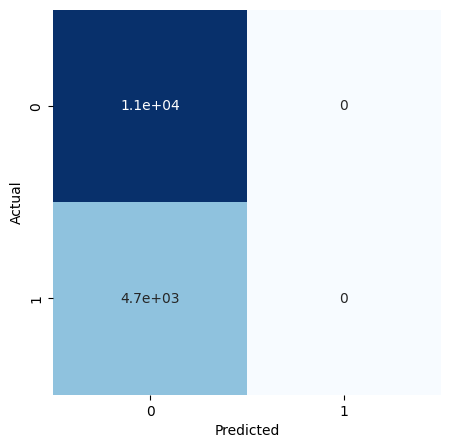

In [ ]:
y2_pred = model2.predict(X_val)
y2_pred = np.argmax(y2_pred, axis=1)

# Configurar el tamaño de la figura
plt.figure(figsize=(5, 5))

# Graficar el heatmap de la matriz de confusión
sns.heatmap(confusion_matrix(y2_val, y2_pred),
            annot=True, #Para mostrar valores
            cbar=False, #Ocultamos la leyenda de los colores
            cmap="Blues")

# Configurar etiquetas de los ejes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Mostrar el gráfico
plt.show()